In [ ]:
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

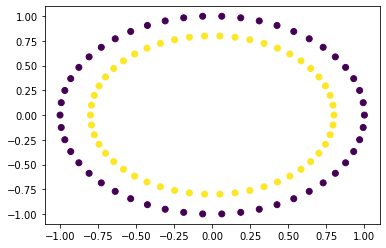

In [ ]:
X, y = make_circles(noise=0.0, random_state=2)
plt.figure(1)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3)

In [ ]:
T = 100

In [ ]:
"""Tamaño de W"""
N = X_train.shape[0]
"""Array con la longitud del dataset de entrenamiento
(array de pesos para cada fila del dataset):"""
w = np.repeat(1/N, N)

"""Array de ceros con la longitud de entrenamiento:"""
epsilon = np.zeros((T))

"""Array de ceros con la longitud de entrenamiento
(valor de actualizacion de los pesos en cada iteracion):"""
beta = np.zeros((T))
#W = np.zeros((N,T)) #matriz de ceros con la longitud de train y filas del numero de modelos T

In [ ]:
# Train
T = 100
treeboost = []

for t in range(T):
    #W[:, t] = w
    tree = DecisionTreeClassifier(criterion="entropy",max_depth=1)
    tree.fit(X_train, y_train, sample_weight=w)
    y_pred_train = tree.predict(X_train)
    treeboost.append(tree)
    #epsilon para el cálculo de beta:
    epsilon[t] = np.sum(w[y_train != y_pred_train])
    #Valor por el que debemos actualizar los pesos:
    beta[t] = epsilon[t] / (1 - epsilon[t])
    #Actualizacion de los pesos (hace mas pequeños los pesos de las muestras acertadas):
    w[y_train == y_pred_train] *= beta[t]
    w = w / np.sum(w) #normaliza los pesos para que todos sumen uno

Predicción en test:

In [ ]:
nc = np.unique(y_test).size  # number of classes
y_pred_test = np.zeros((y_test.size, len(treeboost)), dtype='int16')
for n, model in enumerate(treeboost):
    y_pred_test[:, n] = model.predict(X_test)

In [ ]:
pred_test = []
for prediccion_test in y_pred_test:
  pred_test.append(np.argmax(pd.Series(prediccion_test).value_counts(
  ).sort_index().values.tolist()))

In [ ]:
pred_test = np.array(pred_test)

Predicción en train:

Generamos una matriz de ceros con tamaño train y número de estimadores como columnas. Calculamos la predicción para cada una de las muestras con el modelo entrenado

In [ ]:
nc = np.unique(y_test).size  # numero de clases
y_pred_train = np.zeros((y_train.size, len(treeboost)), dtype='int16')
for n, model in enumerate(treeboost):
    y_pred_train[:, n] = model.predict(X_train)

Calculamos el valor máximo (0 o 1) de esa lista:

In [ ]:
pred_train = []
for prediccion_train in y_pred_train:
  pred_train.append(np.argmax(pd.Series(prediccion_train).value_counts(

  ).sort_index().values.tolist()))

In [ ]:
pred_train = np.array(pred_train)

Calculo de metricas TRAIN:

In [ ]:
#Matriz confusion:
metrics.confusion_matrix(pred_train, y_train)

array([[36,  2],
       [ 0, 32]])

In [ ]:
#Calculo de metricas TRAIN
#Accuracy:
metrics.accuracy_score(pred_train, y_train)

0.9714285714285714

Calculo de metricas TEST:

In [ ]:
#Matriz confusion:
metrics.confusion_matrix(pred_test, y_test)

array([[12,  2],
       [ 2, 14]])

In [ ]:
#Calculo de metricas TEST
#Accuracy:
metrics.accuracy_score(pred_test, y_test)

0.8666666666666667